# **Vector fields**
You can plot a two-dimensional vector field with plt.quiver. This function requires four arguments, all of which are arrays of the same size. The first two arguments define a grid of (x, y) values. Instead of specifying an ordinary function like height or temperature at these points, the next two arguments specify the components of a two-dimensional vector v at the corresponding (x, y) coordinates. Python will draw an arrow at each grid point to represent the vector field v(x, y).

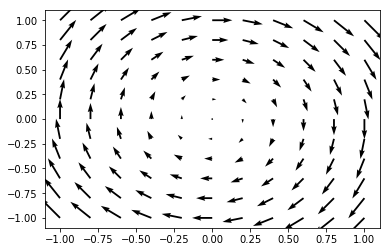

In [0]:
# -------------------------------------------------------------------------
# Create a quiver plot.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt

coords = np.linspace(-1, 1, 11)
X, Y = np.meshgrid(coords, coords)
Vx, Vy = Y, -X
#coords = np.linspace(0, 2, 20)
#X, Y = np.meshgrid(coords, coords)
#Vx, Vy = np.cos(X)*X, np.sin(X)*Y

plt.figure()
plt.quiver(X, Y, Vx, Vy)
plt.show()

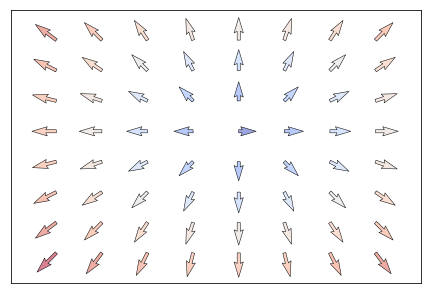

In [0]:
import numpy as np
import matplotlib.pyplot as plt

n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n / 2., X - n/2.)
R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)
U, V = R * np.cos(T), R * np.sin(T)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U, V, R, alpha=.5)
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1, n)
plt.xticks(())
plt.ylim(-1, n)
plt.yticks(())

plt.show()

Vector fields often arise as the gradient of a scalar function. For example, Fick’s law states that the flux of particles at a point is proportional to the gradient of the concentration:
$$J = -D\nabla c.$$
NumPy can estimate the gradient of a function evaluated on a grid via np.gradient.

Because of the way NumPy calculates the gradient and our convention for x and y axes, we must take the transpose of the arrays that np.gradient returns—that is, we must interchange rows and columns.

The following code displays the gradient of a bell curve on its contour plot. 

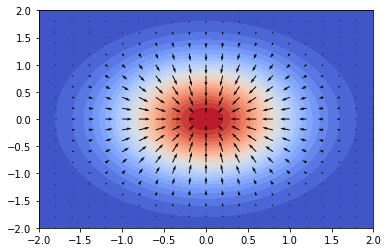

In [0]:
# -------------------------------------------------------------------------
# Calculate and display the gradient of a two-dimensional Gaussian.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt

coords = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(coords[::5], coords[::5])    # coarse grid for vector field
R = np.sqrt(X**2 + Y**2)
Z = np.exp(-R**2)
x, y = np.meshgrid(coords, coords)              # fine grid for contour plot
r = np.sqrt(x**2 + y**2)
z = np.exp(-r**2)

ds = coords[5] - coords[0]                      # coarse grid spacing
dX, dY = np.gradient(Z, ds)                     # calculate gradient

plt.figure()
plt.contourf(x, y, z, 25)                   
plt.set_cmap('coolwarm')
plt.quiver(X, Y, dX.transpose(), dY.transpose(), scale=25, color='k')
plt.axis('tight')
plt.show()

**Exercise:** Plot the gradient of the function 

$$z=x e^{{{-x}^{2}}-{{y}^{2}}} $$

**Streamlines**
A system of first-order ordinary differential equations defines a vector field. One way to find solutions is to follow the arrows, generating “streamlines.” The word comes from an analogy to water flow: The velocity of the water defines a vector field; the trajectory of any droplet of water is a streamline. Electric and magnetic “field lines” are also streamlines.

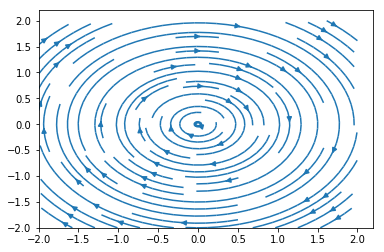

In [0]:
# streamlines.py
# -------------------------------------------------------------------------
# Create streamlines from a vector field.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt

# generate grid of points
lower, upper, step = -2, 2, 0.1
coords = np.arange(lower, upper+step, step)
X, Y = np.meshgrid(coords, coords)

# define vector field
Vx, Vy = Y, -X

# display streamlines defined by vector field
plt.figure()
plt.streamplot(coords, coords, Vx, Vy)
plt.show()


Matplotlib provides a function, streamplot, to create a plot of streamlines representing a vector field. The following program displays a representation of the electric field vector resulting from a multipole arrangement of charges. 

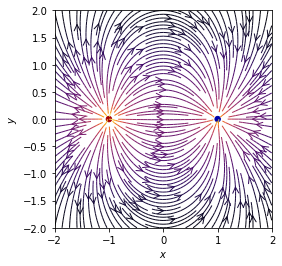

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**int(1)
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

Although it is easy way to visualize the direction of the vector fields, electric field must be continuous lines as you know. Electric field lines around the point charges are calculated using scipy.ode (ordinary differential equations) module.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


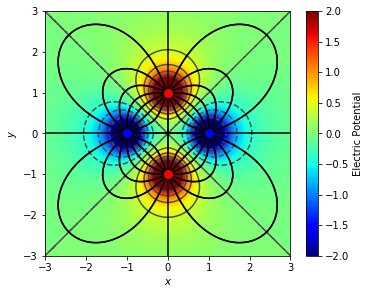

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import ode as ode
from matplotlib import cm
from itertools import product

class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey=0, 0
    for C in charges:
        E=E_point_charge(C.q, C.pos, x, y)
        Ex=Ex+E[0]
        Ey=Ey+E[1]
    return [ Ex, Ey ]

def E_dir(t, y, charges):
    Ex, Ey=E_total(y[0], y[1], charges)
    n=np.sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]

def V_point_charge(q, a, x, y):
    return q/((x-a[0])**2+(y-a[1])**2)**(0.5)

def V_total(x, y, charges):
    V=0
    for C in charges:
        Vp=V_point_charge(C.q, C.pos, x, y)
        V = V+Vp
    return V
  
# charges and positions
charges=[ charge(-1, [-1, 0]), charge(-1, [1, 0]), charge(1, [0, 1]), charge(1, [0, -1]) ]
 
# calculate field lines
x0, x1 = -3, 3
y0, y1 = -3, 3
R = 0.01
# loop over all charges
xs,ys = [],[]
for C in charges:
    # plot field lines starting in current charge
    dt=0.8*R
    if C.q<0:
        dt=-dt
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in np.linspace(0, 2*np.pi*15/16, 16):
        r=ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x=[ C.pos[0] + np.cos(alpha)*R ]
        y=[ C.pos[1] + np.sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                if np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge=True
            if hit_charge or (not (x0<r.y[0] and r.y[0]<x1)) or \
                    (not (y0<r.y[1] and r.y[1]<y1)):
                break
        xs.append(x)
        ys.append(y)
        
# calculate electric potential
vvs = []
xxs = []
yys = []
numcalcv = 300
for xx,yy in product(np.linspace(x0,x1,numcalcv),np.linspace(y0,y1,numcalcv)):
    xxs.append(xx)
    yys.append(yy)
    vvs.append(V_total(xx,yy,charges))
xxs = np.array(xxs)
yys = np.array(yys)
vvs = np.array(vvs)

plt.figure(figsize=(5.5, 4.5),facecolor="w")

# plot field line
for x, y in zip(xs,ys):
    plt.plot(x, y, color="k")

# plot point charges
for C in charges:
    if C.q>0:
        plt.plot(C.pos[0], C.pos[1], 'ro', ms=8*np.sqrt(C.q))
    if C.q<0:
        plt.plot(C.pos[0], C.pos[1], 'bo', ms=8*np.sqrt(-C.q))

# plot electric potential
clim0,clim1 = -2,2
vvs[np.where(vvs<clim0)] = clim0*0.999999 # to avoid error
vvs[np.where(vvs>clim1)] = clim1*0.999999 # to avoid error
plt.tricontour(xxs,yys,vvs,10,colors="0.3")
plt.tricontourf(xxs,yys,vvs,100,cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_clim(clim0,clim1)
cbar.set_ticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
cbar.set_label("Electric Potential")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.axes().set_aspect('equal','datalim')
plt.savefig('electric_force_lines_1.png',dpi=250,bbox_inches="tight",pad_inches=0.02)
plt.show()